In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [4]:
df=pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


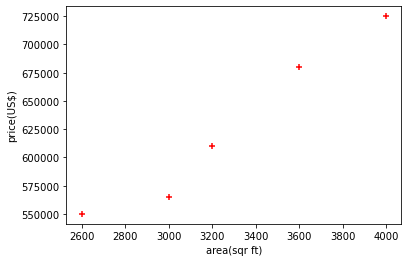

In [5]:
plt.xlabel("area(sqr ft)")
plt.ylabel("price(US$)")
plt.scatter(df.area,df.price, color='red', marker="+")

In [6]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [7]:
reg.predict([[3300]])

array([628715.75342466])

In [19]:
price_pred=reg.predict(df[['area']])
price_pred

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

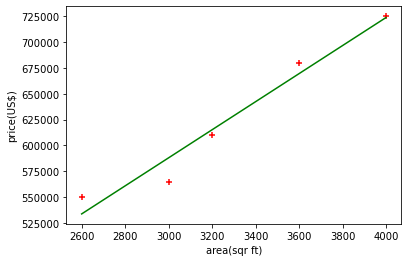

In [20]:
plt.xlabel("area(sqr ft)")
plt.ylabel("price(US$)")
plt.scatter(df.area,df.price, color='red', marker="+")
plt.plot(df.area,price_pred, color='green')

In [34]:
error= df.price-price_pred
se=np.sum(error ** 2)
mse=se/5
mse

186815068.4931509

In [24]:
MSE=mean_squared_error(df[['price']],price_pred)
MSE

186815068.4931509

In [36]:
reg.coef_

array([135.78767123])

In [37]:
reg.intercept_

180616.43835616432

In [42]:
df1=pd.DataFrame([1000,1500,2300,3540,4120,4560,5490,3460,4750,2300,9000,8600,7100],columns=['area'])
df1.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [43]:
p=reg.predict(df1)

In [45]:
df1['price']=p
df1

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [46]:
df1.to_csv("predicted_prices.csv")

In [47]:
from sklearn.metrics import r2_score # R-squared metrics the higher the better your model fits the data (max=1)
r2= r2_score(df.price, price_pred)
r2

0.9584301138199486